<a href="https://colab.research.google.com/github/JSunkel/Forecasting-Models/blob/master/Prophet%20monthly%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
Use Facebook's Prophet model to make monthly predictions for account level disconnects:
1) import packages
2) import the data from a csv file and assign it to a variable
3) define the model
4) fit the model to the data
5) create a dataframe to hold model predictions and assign it to a variable
6) use the model to make predictions
7) save the predictions to a csv file
'''

In [38]:
# 1) import packages
import pandas as pd
from fbprophet import Prophet

In [39]:
# 2) import the data from a csv file and assign it to a variable
df = pd.read_csv('drive/My Drive/Churn/sp_apple_base_monthly_jun.csv')

In [40]:
df.tail(5)

,ds,y
26,2020-02,45924309
27,2020-03,46001723
28,2020-04,46050253
29,2020-05,46201617
30,2020-06,46394576


In [41]:
# 3) define the model 
model = Prophet()

In [42]:
# 4) fit the model to the data
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


In [43]:
# 5) create a dataframe to hold model predictions and assign it to a variable
future = model.make_future_dataframe(periods = 10, freq = 'M')

In [44]:
# 6) use the model to make predictions
forecast = model.predict(future)

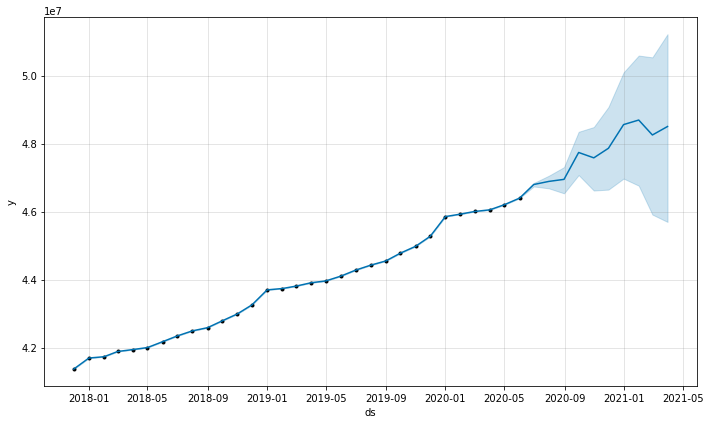

In [45]:
fig = model.plot(forecast)

In [46]:
forecast[['ds', 'yhat']].tail(12)

,ds,yhat
29,2020-05-01,4.620162e+07
30,2020-06-01,4.639458e+07
31,2020-06-30,4.679439e+07
32,2020-07-31,4.688624e+07
33,2020-08-31,4.694612e+07
34,2020-09-30,4.773679e+07
35,2020-10-31,4.757905e+07
36,2020-11-30,4.786094e+07
37,2020-12-31,4.855696e+07
38,2021-01-31,4.869068e+07


In [37]:
# 7) save the predictions to a csv file
forecast.to_csv('drive/My Drive/Churn/sp_apple_base_forecast')